In [1]:
###########################################################################################
# Esther Lowe - SCC Cancer Treatment Analysis of Anti-Cancer Drugs for Pymaceuticals Inc. #
###########################################################################################

# The goal of this analysis is to use visual tools to draw conclusions from scientific data.
# In this experiment, data was collected for 45 days from 250 mice.
# These mice were treated with anti-cancer drugs and their physiological responses monitored.
# The experiment included a placebo as the control group.
# This analysis will compare the data collected from the mice given Capomulin, Ceftamin, Infubinol, Ketapril,
# Naftisol, Propriva, Ramicane, Stelasyn, Zoniferol, as well as the placebo group.


In [2]:
#Imported Dependencies

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hid unnecessary warning messages in the notebook

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Created variables and loaded the proper files for each
mouse_csv = "Resources/mouse_drug_data.csv"
trial_csv = "Resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_csv)
trial_df = pd.read_csv(trial_csv)
mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combined the data into a single dataset & display the data table for preview
combined_data_df = pd.merge(trial_df, mouse_df, how='outer', on='Mouse ID')
combined_data_df.head(11)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


In [6]:
# Stored the Mean Tumor Volume Data Grouped by Drug and Timepoint 

grouped_drug_and_timepoint = combined_data_df.groupby(['Drug','Timepoint'])

grouped_avg_tumor_vol = round(grouped_drug_and_timepoint["Tumor Volume (mm3)"].mean(),4)

# for key, item in grouped_drug_and_timepoint:
#     print(grouped_vol_by_drug_and_timepoint.get_group(key), "\n\n")

# Converted to a DataFrame
mean_tumor_vol_df = pd.DataFrame(grouped_avg_tumor_vol)

# Previewed the DataFrame
mean_tumor_vol_df.head(11)



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                     45.0000
          5                     44.2661
          10                    43.0843
          15                    42.0643
          20                    40.7163
          25                    39.9395
          30                    38.7693
          35                    37.8168
          40                    36.9580
          45                    36.2361
Ceftamin  0                     45.0000

In [7]:
# Split the data into separate DataFrames by drug:

capomulin_mean_tumor_vol_df = mean_tumor_vol_df.loc["Capomulin"]
ceftamin_mean_tumor_vol_df = mean_tumor_vol_df.loc["Ceftamin"]
infubinol_mean_tumor_vol_df = mean_tumor_vol_df.loc["Infubinol"]
ketapril_mean_tumor_vol_df = mean_tumor_vol_df.loc["Ketapril"]
naftisol_mean_tumor_vol_df = mean_tumor_vol_df.loc["Naftisol"]
propriva_mean_tumor_vol_df = mean_tumor_vol_df.loc["Propriva"]
ramicane_mean_tumor_vol_df = mean_tumor_vol_df.loc["Ramicane"]
stelasyn_mean_tumor_vol_df = mean_tumor_vol_df.loc["Stelasyn"]
zoniferol_mean_tumor_vol_df = mean_tumor_vol_df.loc["Zoniferol"]
placebo_mean_tumor_vol_df = mean_tumor_vol_df.loc["Placebo"]


In [8]:
# Re-Formatted the Data Frames into a single DataFrame

mean_tumor_vol_by_drug_df = pd.DataFrame({
    "Capomulin": capomulin_mean_tumor_vol_df["Tumor Volume (mm3)"],
    "Ceftamin":ceftamin_mean_tumor_vol_df["Tumor Volume (mm3)"],
    "Infubinol": infubinol_mean_tumor_vol_df["Tumor Volume (mm3)"],
    "Ketapril":ketapril_mean_tumor_vol_df["Tumor Volume (mm3)"],
    "Naftisol":naftisol_mean_tumor_vol_df["Tumor Volume (mm3)"],
    "Propriva":propriva_mean_tumor_vol_df["Tumor Volume (mm3)"],
    "Ramicane":ramicane_mean_tumor_vol_df["Tumor Volume (mm3)"],
    "Stelasyn":stelasyn_mean_tumor_vol_df["Tumor Volume (mm3)"],
    "Zoniferol":zoniferol_mean_tumor_vol_df["Tumor Volume (mm3)"],
    "Placebo":placebo_mean_tumor_vol_df["Tumor Volume (mm3)"]
})


# Previewed that the reformatting worked
mean_tumor_vol_by_drug_df


,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Propriva,Ramicane,Stelasyn,Zoniferol,Placebo
Timepoint,,,,,,,,,,
0,45.0000,45.0000,45.0000,45.0000,45.0000,45.0000,45.0000,45.0000,45.0000,45.0000
5,44.2661,46.5031,47.0620,47.3892,46.7961,47.2490,43.9449,47.5275,46.8518,47.1256
10,43.0843,48.2851,49.4039,49.5823,48.6942,49.1015,42.5320,49.4638,48.6899,49.4233
15,42.0643,50.0941,51.2964,52.4000,50.9330,51.0673,41.4951,51.5294,50.7791,51.3597
20,40.7163,52.1570,53.1977,54.9209,53.6441,53.3467,40.2383,54.0674,53.1703,54.3644
25,39.9395,54.2877,55.7153,57.6790,56.7320,55.5041,38.9743,56.1661,55.4329,57.4826
30,38.7693,56.7695,58.2994,60.9945,59.5595,58.1964,38.7031,59.8267,57.7135,59.8091
35,37.8168,58.8275,60.7425,63.3717,62.6851,60.3502,37.4520,62.4407,60.0894,62.4206
40,36.9580,61.4679,63.1628,66.0686,65.6008,63.0455,36.5741,65.3564,62.9167,65.0527


In [9]:
# Stored the Standard Error of Tumor Volumes Grouped by Drug and Timepoint 
vol_standard_errors = grouped_drug_and_timepoint.sem()["Tumor Volume (mm3)"]

# Converted to a DataFrame 
vol_standard_errors_df = pd.DataFrame(vol_standard_errors)

# Previewed the DataFrame
vol_standard_errors_df.head(11)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000

In [10]:
# Separated the tumor volume standard errors by drug in order to graph them properly:

capomulin_vol_standard_errors_df = vol_standard_errors_df.loc["Capomulin"]
ceftamin_vol_standard_errors_df = vol_standard_errors_df.loc["Ceftamin"]
infubinol_vol_standard_errors_df = vol_standard_errors_df.loc["Infubinol"]
ketapril_vol_standard_errors_df = vol_standard_errors_df.loc["Ketapril"]
naftisol_vol_standard_errors_df = vol_standard_errors_df.loc["Naftisol"]
propriva_vol_standard_errors_df = vol_standard_errors_df.loc["Propriva"]
ramicane_vol_standard_errors_df = vol_standard_errors_df.loc["Ramicane"]
stelasyn_vol_standard_errors_df = vol_standard_errors_df.loc["Stelasyn"]
zoniferol_vol_standard_errors_df = vol_standard_errors_df.loc["Zoniferol"]
placebo_vol_standard_errors_df = vol_standard_errors_df.loc["Placebo"]

In [11]:
capomulin_vol_standard_errors_df 

,Tumor Volume (mm3)
Timepoint,
0,0.000000
5,0.448593
10,0.702684
15,0.838617
20,0.909731
25,0.881642
30,0.934460
35,1.052241
40,1.223608


In [12]:
#Combined into a Single DataFrame:

sterr_tumor_vol_df = pd.DataFrame({
    "Capomulin": capomulin_vol_standard_errors_df["Tumor Volume (mm3)"],
    "Ceftamin":ceftamin_vol_standard_errors_df["Tumor Volume (mm3)"],
    "Infubinol": infubinol_vol_standard_errors_df["Tumor Volume (mm3)"],
    "Ketapril":ketapril_vol_standard_errors_df["Tumor Volume (mm3)"],
    "Naftisol":naftisol_vol_standard_errors_df["Tumor Volume (mm3)"],
    "Propriva":propriva_vol_standard_errors_df["Tumor Volume (mm3)"],
    "Ramicane":ramicane_vol_standard_errors_df["Tumor Volume (mm3)"],
    "Stelasyn":stelasyn_vol_standard_errors_df["Tumor Volume (mm3)"],
    "Zoniferol":zoniferol_vol_standard_errors_df["Tumor Volume (mm3)"],
    "Placebo":placebo_vol_standard_errors_df["Tumor Volume (mm3)"]
})


# Previewed that the reformatting worked
sterr_tumor_vol_df 

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Propriva,Ramicane,Stelasyn,Zoniferol,Placebo
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.231708,0.482955,0.239862,0.188950,0.218091
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.376195,0.720225,0.433678,0.263949,0.402064
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.466109,0.770432,0.493261,0.370544,0.614461
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.555181,0.786199,0.621889,0.533182,0.839609
25,0.881642,0.439356,0.550315,0.755413,0.813706,0.577401,0.746991,0.741922,0.602513,1.034872
30,0.934460,0.490620,0.631061,0.934121,0.975496,0.746045,0.864906,0.899548,0.800043,1.218231
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.084929,0.967433,1.003186,0.881426,1.287481
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.564779,1.128445,1.410435,0.998515,1.370634


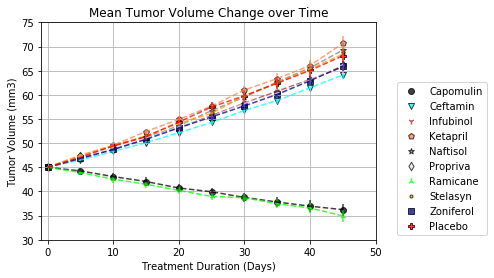

In [13]:
# Determined the highest value to verify the range axis... 70.66 mm3
max_avg_tumor_vol = grouped_avg_tumor_vol.max()
max_avg_tumor_vol

# Domain of axis should be 0 to 45 days
x_axis = [0,5,10,15,20,25,30,35,40,45]


# Created a scatter plot to show how the tumor volumes change over time for each treatment:
plt.scatter(x_axis, capomulin_mean_tumor_vol_df, marker="o", facecolors="black", edgecolors="black", alpha=0.75, label="Capomulin")
plt.scatter(x_axis, ceftamin_mean_tumor_vol_df, marker="v", facecolors="aqua", edgecolors="black", alpha=0.75, label="Ceftamin")
plt.scatter(x_axis, infubinol_mean_tumor_vol_df, marker="1", facecolors="brown", edgecolors="black", alpha=0.75, label="Infubinol")
plt.scatter(x_axis, ketapril_mean_tumor_vol_df, marker="p", facecolors="coral", edgecolors="black", alpha=0.75, label="Ketapril")
plt.scatter(x_axis, naftisol_mean_tumor_vol_df, marker="*", facecolors="grey", edgecolors="black", alpha=0.75, label="Naftisol")
plt.scatter(x_axis, propriva_mean_tumor_vol_df, marker="d", facecolors="magenta", edgecolors="black", alpha=0.75, label="Propriva")
plt.scatter(x_axis, ramicane_mean_tumor_vol_df, marker="2", facecolors="lime", edgecolors="black", alpha=0.75, label="Ramicane")
plt.scatter(x_axis, stelasyn_mean_tumor_vol_df, marker=".", facecolors="orange", edgecolors="black", alpha=0.75, label="Stelasyn")
plt.scatter(x_axis, zoniferol_mean_tumor_vol_df, marker="s", facecolors="navy", edgecolors="black", alpha=0.75, label="Zoniferol")
plt.scatter(x_axis, placebo_mean_tumor_vol_df, marker="P", facecolors="red", edgecolors="black", alpha=0.75, label="Placebo")


# Set x and y limits
plt.xlim(-1, 50)
plt.ylim(30, 75)

#Inserted title, legend, grid, and axis labels:
plt.legend(bbox_to_anchor=(1.05, 0.75))
plt.title("Mean Tumor Volume Change over Time")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Treatment Duration (Days)")
plt.grid()

#plotted the errorbars:
plt.errorbar(x_axis, capomulin_mean_tumor_vol_df["Tumor Volume (mm3)"], yerr = capomulin_vol_standard_errors_df["Tumor Volume (mm3)"], ecolor="black", color ='black', alpha=0.75, fmt="--")
plt.errorbar(x_axis, ceftamin_mean_tumor_vol_df["Tumor Volume (mm3)"], yerr = ceftamin_vol_standard_errors_df["Tumor Volume (mm3)"], ecolor="aqua", color = "aqua", alpha=0.75, fmt="--")
plt.errorbar(x_axis, infubinol_mean_tumor_vol_df["Tumor Volume (mm3)"], yerr = infubinol_vol_standard_errors_df["Tumor Volume (mm3)"], ecolor="brown",color = "brown", alpha=0.75, fmt="--")
plt.errorbar(x_axis, ketapril_mean_tumor_vol_df["Tumor Volume (mm3)"], yerr = ketapril_vol_standard_errors_df["Tumor Volume (mm3)"], ecolor="coral",color = "coral", alpha=0.75, fmt="--")
plt.errorbar(x_axis, naftisol_mean_tumor_vol_df["Tumor Volume (mm3)"], yerr = naftisol_vol_standard_errors_df["Tumor Volume (mm3)"], ecolor="grey",color = "grey", alpha=0.75, fmt="--")
plt.errorbar(x_axis, propriva_mean_tumor_vol_df["Tumor Volume (mm3)"], yerr = propriva_vol_standard_errors_df["Tumor Volume (mm3)"], ecolor="magenta",color = "lavender", alpha=0.75, fmt="--")
plt.errorbar(x_axis, ramicane_mean_tumor_vol_df["Tumor Volume (mm3)"], yerr = ramicane_vol_standard_errors_df["Tumor Volume (mm3)"], ecolor="lime",color = "lime", alpha=0.75, fmt="--")
plt.errorbar(x_axis, stelasyn_mean_tumor_vol_df["Tumor Volume (mm3)"], yerr = stelasyn_vol_standard_errors_df["Tumor Volume (mm3)"], ecolor="orange",color = "orange", alpha=0.75, fmt="--")
plt.errorbar(x_axis, zoniferol_mean_tumor_vol_df["Tumor Volume (mm3)"], yerr = zoniferol_vol_standard_errors_df["Tumor Volume (mm3)"], ecolor="navy",color = "navy", alpha=0.75, fmt="--")
plt.errorbar(x_axis, placebo_mean_tumor_vol_df["Tumor Volume (mm3)"], yerr = placebo_vol_standard_errors_df["Tumor Volume (mm3)"], ecolor="red",color = "red", alpha=0.75, fmt="--")

# Saved the Figure
plt.savefig("Resources/metastatic_tumor_volume_change.png")

In [14]:
# ################## Alternative method ##############
# # Generated a Scatter Plot (with Error Bars) showing how the number of metastatic sites changed over time for each treatment

# # Set up the plot:
# fig, ax = plt.subplots()

#For example:
# ax.errorbar(x_axis, capomulin_mean_tumor_vol_df["Tumor Volume (mm3)"] , yerr = capomulin_vol_standard_errors_df["Tumor Volume (mm3)"], fmt="o")
# plt.plot(x_axis, capomulin_mean_tumor_vol_df["Tumor Volume (mm3)"], linewidth=1)


# ax.set_xlim(-1, 50)

# # Added title, labels to the x and y axes, and a legend to the plot:
# fig.suptitle("Drug Influence on Metastatic Tumor Volume")
# ax.set_xlabel("Days")
# ax.set_ylabel("Tumor Volume (mm3)")
# ax.legend(bbox_to_anchor=(1.05, 0.75))

# # Showed the Figure
# plt.show()

# # Saved the Figure
# #plt.savefig("Resources/metastatic_tumor_volume_change.png")

In [15]:
# Stored the mean met. site data grouped by drug and timepoint 
grouped_mean_met_site = round(grouped_drug_and_timepoint["Metastatic Sites"].mean(),4)

# Converted to DataFrame
mean_met_site_df = pd.DataFrame(grouped_mean_met_site)

# Previewed DataFrame
mean_met_site_df.head(11)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                    0.0000
          5                    0.1600
          10                   0.3200
          15                   0.3750
          20                   0.6522
          25                   0.8182
          30                   1.0909
          35                   1.1818
          40                   1.3810
          45                   1.4762
Ceftamin  0                    0.0000

In [16]:
# Re-formatted to separate the data by drug:

capomulin_mean_met_site_df = mean_met_site_df.loc["Capomulin"]
ceftamin_mean_met_site_df = mean_met_site_df.loc["Ceftamin"]
infubinol_mean_met_site_df = mean_met_site_df.loc["Infubinol"]
ketapril_mean_met_site_df = mean_met_site_df.loc["Ketapril"]
naftisol_mean_met_site_df = mean_met_site_df.loc["Naftisol"]
propriva_mean_met_site_df = mean_met_site_df.loc["Propriva"]
ramicane_mean_met_site_df = mean_met_site_df.loc["Ramicane"]
stelasyn_mean_met_site_df = mean_met_site_df.loc["Stelasyn"]
zoniferol_mean_met_site_df = mean_met_site_df.loc["Zoniferol"]
placebo_mean_met_site_df = mean_met_site_df.loc["Placebo"]

In [17]:
# Re-Formated the Data Frames into one DataFrame:

mean_met_site_df = pd.DataFrame({
    "Capomulin": capomulin_mean_met_site_df["Metastatic Sites"],
    "Ceftamin":ceftamin_mean_met_site_df["Metastatic Sites"],
    "Infubinol": infubinol_mean_met_site_df["Metastatic Sites"],
    "Ketapril":ketapril_mean_met_site_df["Metastatic Sites"],
    "Naftisol":naftisol_mean_met_site_df["Metastatic Sites"],
    "Propriva":propriva_mean_met_site_df["Metastatic Sites"],
    "Ramicane":ramicane_mean_met_site_df["Metastatic Sites"],
    "Stelasyn":stelasyn_mean_met_site_df["Metastatic Sites"],
    "Zoniferol":zoniferol_mean_met_site_df["Metastatic Sites"],
    "Placebo":placebo_mean_met_site_df["Metastatic Sites"]
})


# Previewed the reformatting:
mean_met_site_df

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Propriva,Ramicane,Stelasyn,Zoniferol,Placebo
Timepoint,,,,,,,,,,
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.1600,0.3810,0.2800,0.3043,0.2609,0.3200,0.1200,0.2400,0.1667,0.3750
10,0.3200,0.6000,0.6667,0.5909,0.5238,0.5652,0.2500,0.4783,0.5000,0.8333
15,0.3750,0.7895,0.9048,0.8421,0.8571,0.7647,0.3333,0.7826,0.8095,1.2500
20,0.6522,1.1111,1.0500,1.2105,1.1500,1.0000,0.3478,0.9524,1.2941,1.5263
25,0.8182,1.5000,1.2778,1.6316,1.5000,1.3571,0.6522,1.1579,1.6875,1.9412
30,1.0909,1.9375,1.5882,2.0556,2.0667,1.6154,0.7826,1.3889,1.9333,2.2667
35,1.1818,2.0714,1.6667,2.2941,2.2667,2.3000,0.9524,1.5625,2.2857,2.6429
40,1.3810,2.3571,2.1000,2.7333,2.4667,2.7778,1.1000,1.5833,2.7857,3.1667


In [18]:
# Stored the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sites_standard_errors = grouped_drug_and_timepoint.sem()["Metastatic Sites"]

# Converted to a DataFrame 
sites_standard_errors_df = pd.DataFrame(sites_standard_errors)

# Previewed the DataFrame
sites_standard_errors_df.head(11)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000

In [19]:
# Re-Formatted into DataFrames:

capomulin_sites_standard_errors_df = sites_standard_errors_df.loc["Capomulin"]
ceftamin_sites_standard_errors_df = sites_standard_errors_df.loc["Ceftamin"]
infubinol_sites_standard_errors_df = sites_standard_errors_df.loc["Infubinol"]
ketapril_sites_standard_errors_df = sites_standard_errors_df.loc["Ketapril"]
naftisol_sites_standard_errors_df = sites_standard_errors_df.loc["Naftisol"]
propriva_sites_standard_errors_df = sites_standard_errors_df.loc["Propriva"]
ramicane_sites_standard_errors_df = sites_standard_errors_df.loc["Ramicane"]
stelasyn_sites_standard_errors_df = sites_standard_errors_df.loc["Stelasyn"]
zoniferol_sites_standard_errors_df = sites_standard_errors_df.loc["Zoniferol"]
placebo_sites_standard_errors_df = sites_standard_errors_df.loc["Placebo"]


In [20]:
#Combined into a Single DataFrame:

sterr_met_site_df = pd.DataFrame({
    "Capomulin": capomulin_sites_standard_errors_df["Metastatic Sites"],
    "Ceftamin":ceftamin_sites_standard_errors_df["Metastatic Sites"],
    "Infubinol": infubinol_sites_standard_errors_df["Metastatic Sites"],
    "Ketapril":ketapril_sites_standard_errors_df["Metastatic Sites"],
    "Naftisol":naftisol_sites_standard_errors_df["Metastatic Sites"],
    "Propriva":propriva_sites_standard_errors_df["Metastatic Sites"],
    "Ramicane":ramicane_sites_standard_errors_df["Metastatic Sites"],
    "Stelasyn":stelasyn_sites_standard_errors_df["Metastatic Sites"],
    "Zoniferol":zoniferol_sites_standard_errors_df["Metastatic Sites"],
    "Placebo":placebo_sites_standard_errors_df["Metastatic Sites"]
})


# Previewed that the reformatting worked
sterr_met_site_df

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Propriva,Ramicane,Stelasyn,Zoniferol,Placebo
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.095219,0.066332,0.087178,0.077709,0.100947
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.105690,0.090289,0.123672,0.109109,0.115261
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.136377,0.115261,0.153439,0.111677,0.190221
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.171499,0.119430,0.200905,0.166378,0.234064
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.199095,0.119430,0.219824,0.236621,0.263888
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.266469,0.139968,0.230641,0.248168,0.300264
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.366667,0.145997,0.240983,0.285714,0.341412
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.433903,0.160591,0.312815,0.299791,0.297294


In [21]:
# Determined the highest value to verify the range axis... 3.36
max_mean_met_site = grouped_mean_met_site.max()
max_mean_met_site

3.3636

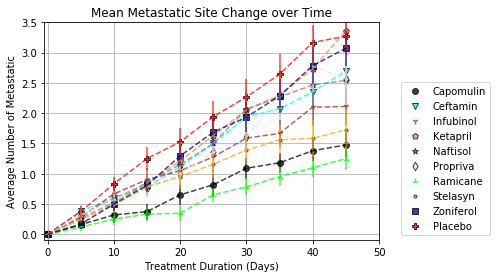

In [22]:
# Created a scatter plot to show how the average number of tumor sites changed over time for each treatment:

plt.scatter(x_axis, capomulin_mean_met_site_df, marker="o", facecolors="black", edgecolors="black", alpha=0.75, label="Capomulin")
plt.scatter(x_axis, ceftamin_mean_met_site_df, marker="v", facecolors="aqua", edgecolors="black", alpha=0.75, label="Ceftamin")
plt.scatter(x_axis, infubinol_mean_met_site_df, marker="1", facecolors="brown", edgecolors="black", alpha=0.75, label="Infubinol")
plt.scatter(x_axis, ketapril_mean_met_site_df, marker="p", facecolors="coral", edgecolors="black", alpha=0.75, label="Ketapril")
plt.scatter(x_axis, naftisol_mean_met_site_df, marker="*", facecolors="grey", edgecolors="black", alpha=0.75, label="Naftisol")
plt.scatter(x_axis, propriva_mean_met_site_df, marker="d", facecolors="magenta", edgecolors="black", alpha=0.75, label="Propriva")
plt.scatter(x_axis, ramicane_mean_met_site_df, marker="2", facecolors="lime", edgecolors="black", alpha=0.75, label="Ramicane")
plt.scatter(x_axis, stelasyn_mean_met_site_df, marker=".", facecolors="orange", edgecolors="black", alpha=0.75, label="Stelasyn")
plt.scatter(x_axis, zoniferol_mean_met_site_df, marker="s", facecolors="navy", edgecolors="black", alpha=0.75, label="Zoniferol")
plt.scatter(x_axis, placebo_mean_met_site_df, marker="P", facecolors="red", edgecolors="black", alpha=0.75, label="Placebo")


# Set x and y limits
plt.xlim(-0.5, 50)
plt.ylim(-0.09, 3.5)

#Inserted title, legend, axis labels, and grid:
plt.legend(bbox_to_anchor=(1.05, 0.75))
plt.title("Mean Metastatic Site Change over Time")
plt.ylabel("Average Number of Metastatic")
plt.xlabel("Treatment Duration (Days)")
plt.grid()

#plotted the errorbars:
plt.errorbar(x_axis, capomulin_mean_met_site_df["Metastatic Sites"], yerr = capomulin_sites_standard_errors_df["Metastatic Sites"], ecolor="black", color ='black', alpha=0.75, fmt="--")
plt.errorbar(x_axis, ceftamin_mean_met_site_df["Metastatic Sites"], yerr = ceftamin_sites_standard_errors_df["Metastatic Sites"], ecolor="aqua", color = "aqua", alpha=0.75, fmt="--")
plt.errorbar(x_axis, infubinol_mean_met_site_df["Metastatic Sites"], yerr = infubinol_sites_standard_errors_df["Metastatic Sites"], ecolor="brown",color = "brown", alpha=0.75, fmt="--")
plt.errorbar(x_axis, ketapril_mean_met_site_df["Metastatic Sites"], yerr = ketapril_sites_standard_errors_df["Metastatic Sites"], ecolor="coral",color = "coral", alpha=0.75, fmt="--")
plt.errorbar(x_axis, naftisol_mean_met_site_df["Metastatic Sites"], yerr = naftisol_sites_standard_errors_df["Metastatic Sites"], ecolor="grey",color = "grey", alpha=0.75, fmt="--")
plt.errorbar(x_axis, propriva_mean_met_site_df["Metastatic Sites"], yerr = propriva_sites_standard_errors_df["Metastatic Sites"], ecolor="lavender",color = "magenta", alpha=0.75, fmt="--")
plt.errorbar(x_axis, ramicane_mean_met_site_df["Metastatic Sites"], yerr = ramicane_sites_standard_errors_df["Metastatic Sites"], ecolor="lime",color = "lime", alpha=0.75, fmt="--")
plt.errorbar(x_axis, stelasyn_mean_met_site_df["Metastatic Sites"], yerr = stelasyn_sites_standard_errors_df["Metastatic Sites"], ecolor="orange",color = "orange", alpha=0.75, fmt="--")
plt.errorbar(x_axis, zoniferol_mean_met_site_df["Metastatic Sites"], yerr = zoniferol_sites_standard_errors_df["Metastatic Sites"], ecolor="navy",color = "navy", alpha=0.75, fmt="--")
plt.errorbar(x_axis, placebo_mean_met_site_df["Metastatic Sites"], yerr = placebo_sites_standard_errors_df["Metastatic Sites"], ecolor="red",color = "red", alpha=0.75, fmt="--")


# Saved the Figure
plt.savefig("Resources/avg_num_metastatic_sites_change.png")

In [23]:
# Stored the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice = grouped_drug_and_timepoint['Mouse ID'].count()

# Converted the grouby to a DataFrame
count_mice_df =  pd.DataFrame(count_mice)
# Previewed the DataFrame
count_mice_df.head(11)

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
          25               22
          30               22
          35               22
          40               21
          45               21
Ceftamin  0                25

In [24]:
# Re-formatted the DataFrames

capomulin_count_mice_df = count_mice_df.loc["Capomulin"]
ceftamin_count_mice_df = count_mice_df.loc["Ceftamin"]
infubinol_count_mice_df = count_mice_df.loc["Infubinol"]
ketapril_count_mice_df = count_mice_df.loc["Ketapril"]
naftisol_count_mice_df = count_mice_df.loc["Naftisol"]
propriva_count_mice_df = count_mice_df.loc["Propriva"]
ramicane_count_mice_df = count_mice_df.loc["Ramicane"]
stelasyn_count_mice_df = count_mice_df.loc["Stelasyn"]
zoniferol_count_mice_df = count_mice_df.loc["Zoniferol"]
placebo_count_mice_df = count_mice_df.loc["Placebo"]

In [25]:
# Re-combined the DataFrames to make a data frame with multiple columns

combined_count_mice_df = pd.DataFrame({
    "Capomulin": capomulin_count_mice_df["Mouse ID"],
    "Ceftamin":ceftamin_count_mice_df["Mouse ID"],
    "Infubinol":infubinol_count_mice_df["Mouse ID"],
    "Ketapril":ketapril_count_mice_df["Mouse ID"],
    "Naftisol":naftisol_count_mice_df["Mouse ID"],
    "Propriva":propriva_count_mice_df["Mouse ID"],
    "Ramicane":ramicane_count_mice_df["Mouse ID"],
    "Stelasyn":stelasyn_count_mice_df["Mouse ID"],
    "Zoniferol":zoniferol_count_mice_df["Mouse ID"],
    "Placebo":placebo_count_mice_df["Mouse ID"]
})

# Previewed the new combined DataFrame:
combined_count_mice_df

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Propriva,Ramicane,Stelasyn,Zoniferol,Placebo
Timepoint,,,,,,,,,,
0,25,25,25,25,25,26,25,26,25,25
5,25,21,25,23,23,25,25,25,24,24
10,25,20,21,22,21,23,24,23,22,24
15,24,19,21,19,21,17,24,23,21,20
20,23,18,20,19,20,17,23,21,17,19
25,22,18,18,19,18,14,23,19,16,17
30,22,16,17,18,15,13,23,18,15,15
35,22,14,12,17,15,10,21,16,14,14
40,21,14,10,15,15,9,20,12,14,12


In [26]:
# Calculated the survival rates as a percentage for the entire dataframe:

survival_percentage_df = (combined_count_mice_df/25)*100

# Displayed the data to confirm:
survival_percentage_df

,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Propriva,Ramicane,Stelasyn,Zoniferol,Placebo
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0,100.0
5,100.0,84.0,100.0,92.0,92.0,100.0,100.0,100.0,96.0,96.0
10,100.0,80.0,84.0,88.0,84.0,92.0,96.0,92.0,88.0,96.0
15,96.0,76.0,84.0,76.0,84.0,68.0,96.0,92.0,84.0,80.0
20,92.0,72.0,80.0,76.0,80.0,68.0,92.0,84.0,68.0,76.0
25,88.0,72.0,72.0,76.0,72.0,56.0,92.0,76.0,64.0,68.0
30,88.0,64.0,68.0,72.0,60.0,52.0,92.0,72.0,60.0,60.0
35,88.0,56.0,48.0,68.0,60.0,40.0,84.0,64.0,56.0,56.0
40,84.0,56.0,40.0,60.0,60.0,36.0,80.0,48.0,56.0,48.0


In [84]:
# # If I wanted to do this for each individual drug rather than the entire DataFrame:
# capomulin_survival_percentage = (capomulin_count_mice_df/25)*100
# capomulin_survival_percentage

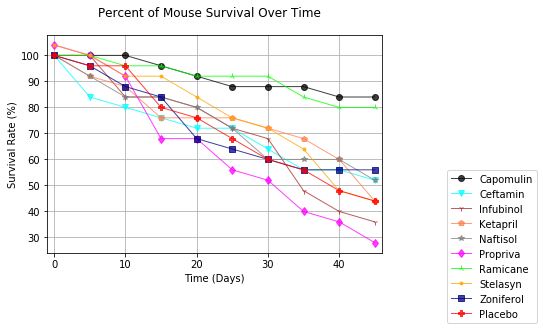

<Figure size 432x288 with 0 Axes>

In [83]:
# Generated a Scatter Plot showing how the survival rate of mice (as a percent) changed over time for each treatment:

# Set up the plot:
fig, ax = plt.subplots()

ax.plot(x_axis, survival_percentage_df["Capomulin"], linewidth=1, marker="o", c ="black", alpha=0.75, label="Capomulin")
ax.plot(x_axis, survival_percentage_df["Ceftamin"], linewidth=1, marker="v", c ="aqua", alpha=0.75, label="Ceftamin")
ax.plot(x_axis, survival_percentage_df["Infubinol"], linewidth=1, marker="1", c ="brown", alpha=0.75, label="Infubinol")
ax.plot(x_axis, survival_percentage_df["Ketapril"], linewidth=1, marker="p", c ="coral", alpha=0.75, label="Ketapril")
ax.plot(x_axis, survival_percentage_df["Naftisol"], linewidth=1, marker="*", c ="grey", alpha=0.75, label="Naftisol")
ax.plot(x_axis, survival_percentage_df["Propriva"], linewidth=1, marker="d", c ="magenta", alpha=0.75, label="Propriva")
ax.plot(x_axis, survival_percentage_df["Ramicane"], linewidth=1, marker="2", c ="lime", alpha=0.75, label="Ramicane")
ax.plot(x_axis, survival_percentage_df["Stelasyn"], linewidth=1, marker=".", c ="orange", alpha=0.75, label="Stelasyn")
ax.plot(x_axis, survival_percentage_df["Zoniferol"], linewidth=1, marker="s", c ="navy", alpha=0.75, label="Zoniferol")
ax.plot(x_axis, survival_percentage_df["Placebo"], linewidth=1, marker="P", c ="red", alpha=0.75, label="Placebo")

ax.set_xlim(-1, 46)

# Added title, labels to the x and y axes, and a legend to the plot:
fig.suptitle("Percent of Mouse Survival Over Time")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Survival Rate (%)")
ax.legend(bbox_to_anchor=(1.18, 0.4035))
ax.grid()

# Showed the Figure
plt.show()

# Saved the Figure
plt.savefig("Resources/Percent of Mouse Survival Over Time.png")

In [131]:
# Calculate the percent changes for each drug
percent_tumor_change_by_drug_df=((mean_tumor_vol_by_drug_df.iloc[9,:] - mean_tumor_vol_by_drug_df.iloc[0,:])/mean_tumor_vol_by_drug_df.iloc[0,:])*100
ordered_ptcbd_df = percent_tumor_change_by_drug_df.sort_values(ascending=True)

print(percent_tumor_change_by_drug_df)


Capomulin   -19.475333
Ceftamin     42.516444
Infubinol    46.123556
Ketapril     57.028889
Naftisol     53.923333
Propriva     47.241111
Ramicane    -22.320889
Stelasyn     52.085111
Zoniferol    46.579778
Placebo      51.298000
dtype: float64


In [186]:
# Separated drugs by whether or not the tumors were positively effected by the influence of the drug administered:
insignificant_drugs_df = ordered_ptcbd_df[ordered_ptcbd_df>=0]
significant_drugs_df = ordered_ptcbd_df[ordered_ptcbd_df<0]

#Rounding the values to make percents
insignificant_drugs_df = round(insignificant_drugs_df)
significant_drugs_df = round(significant_drugs_df)

#Created a list to use as labels on the bar chart for each drug:
insignificant_drug_list = list(insignificant_drugs_df.keys())
significant_drug_list = list(significant_drugs_df.keys())


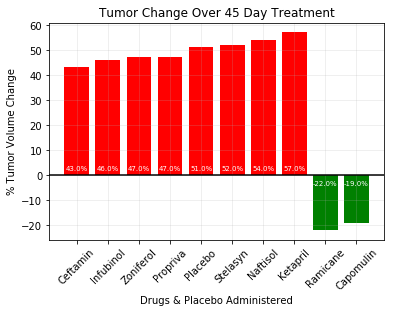

In [200]:
# Generated a bar chart to display the impact of the anti-cancer drugs on percent tumor volume change
plt.grid(alpha = 0.25)
plt.bar(insignificant_drug_list, insignificant_drugs_df , color='r', align="center")
plt.bar(significant_drug_list, significant_drugs_df , color='g', align="center")
plt.xticks(rotation=45)
plt.axhline(y=0, xmin=0, xmax=1, c="black")

plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drugs & Placebo Administered")
plt.ylabel("% Tumor Volume Change")

# percent values along the x-axis
for i in range(len(insignificant_drug_list)):
    plt.text(x = i-0.35 , y = 2, s = f"{insignificant_drugs_df[i]}%", size = 7, color="white")
    
for i in range(len(significant_drug_list)):
    plt.text(x = (8+i)-0.4 , y = -4, s = f"{significant_drugs_df[i]}%", size = 7, color="white")

    
# Saved the Figure
plt.savefig("Resources/Tumor Change Over 45 Day Treatment.png")
